In [123]:
import pandas as pd
import numpy as np
dataset=pd.read_excel("C:/Users/97254/Downloads/patient_level__ver 12_proj1_sn_5-13.xlsx", engine='openpyxl')
print(dataset.shape)

(1020, 70)


In [124]:
dataset.head()

,ser_num,ICU_LOS,LOS_Group,ICU_mortality,HOSP_mortality,28_mortality,90 days mortality,trauma,metabolic,gastrointestinal,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,2,9,LOS_8-13,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,3,5,LOS_5-7,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,5,13,LOS_8-13,0,0,0,0,0,0,1,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,7,6,LOS_5-7,0,0,0,0,0,1,1,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,9,9,LOS_8-13,0,0,0,0,1,1,1,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


In [125]:
#remove NAN
dataset = dataset[~dataset['age'].isin(['NAN'])]

In [126]:
dataset = dataset[[
    'ICU_mortality',
 'LOS_Group',
'trauma',
'metabolic',
'gastrointestinal',
'Sepsis'
,'age'
,'gender'
,'weight'
,'BMI'
,'active problems'
,'background problems'
,'feeding'
,'Target_pro_day'
,'pro_to_target_day0'
,'pro_to_target_day1'
,'pro_to_target_day2'
,'pro_to_target_day3'
,'pro_to_target_day4'
,'pro_to_target_day5'
,'pro_to_target_day6'
,'pro_to_target_day7'
,'pro_to_target_day8'
,'pro_to_target_day9'
,'pro_to_target_day10'
,'pro_to_target_day11'
,'pro_to_target_day12'
,'pro_to_target_day13'
,'Total_EN_pro'
,'Total_PN_pro'
,'EN_pro_day0'
,'PN_pro_day0'
,'EN_pro_day1'
,'PN_pro_day1'
,'EN_pro_day2'
,'PN_pro_day2'
,'EN_pro_day3'
,'PN_pro_day3'
,'EN_pro_day4'
,'PN_pro_day4'
,'EN_pro_day5'
,'PN_pro_day5'
,'EN_pro_day6'
,'PN_pro_day6'
,'EN_pro_day7'
,'PN_pro_day7'
,'EN_pro_day8'
,'PN_pro_day8'
,'EN_pro_day9'
,'PN_pro_day9'
,'EN_pro_day10'
,'PN_pro_day10'
,'EN_pro_day11'
,'PN_pro_day11'
,'EN_pro_day12'
,'PN_pro_day12'
,'EN_pro_day13'
,'PN_pro_day13'  
,'EN_pro_day0/kg'   
,'EN_pro_day1/kg'    
,'EN_pro_day2/kg'      
,'EN_pro_day3/kg'    
,'EN_pro_day4/kg'       
,'EN_pro_day5/kg'        
    
]]
dataset.shape

(976, 64)

In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['active problems'] = le.fit_transform(dataset['active problems'].astype(str))
dataset['background problems'] = le.fit_transform(dataset['background problems'].astype(str))
dataset['gender'] = le.fit_transform(dataset['gender'].astype(str))
dataset['feeding'] = le.fit_transform(dataset['feeding'].astype(str))
dataset['LOS_Group'] = le.fit_transform(dataset['feeding'].astype(str))

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 0 to 1019
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ICU_mortality        976 non-null    int64  
 1   LOS_Group            976 non-null    int32  
 2   trauma               976 non-null    int64  
 3   metabolic            976 non-null    int64  
 4   gastrointestinal     976 non-null    int64  
 5   Sepsis               976 non-null    int64  
 6   age                  976 non-null    object 
 7   gender               976 non-null    int32  
 8   weight               976 non-null    float64
 9   BMI                  976 non-null    float64
 10  active problems      976 non-null    int32  
 11  background problems  976 non-null    int32  
 12  feeding              976 non-null    int32  
 13  Target_pro_day       976 non-null    float64
 14  pro_to_target_day0   976 non-null    float64
 15  pro_to_target_day1   976 non-null    fl

In [65]:
dataset.shape

(976, 64)

In [29]:
dataset.ICU_mortality.value_counts()

0    741
1    235
Name: ICU_mortality, dtype: int64

In [64]:
from pycaret.classification import *
model_setup = setup(data=dataset, target='ICU_mortality', data_split_stratify = True,pca = True, pca_components =40,normalize=True)

,Description,Value
0,session_id,2090
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(976, 64)"
5,Missing Values,False
6,Numeric Features,53
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [77]:
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7569,0.0000,0.0426,0.3833,0.0747,0.0359,0.0678,0.0100
rf,Random Forest Classifier,0.7554,0.5720,0.0423,0.3250,0.0733,0.0324,0.0552,0.2040
et,Extra Trees Classifier,0.7526,0.5914,0.0548,0.3667,0.0930,0.0384,0.0591,0.1560
lr,Logistic Regression,0.7511,0.5968,0.0548,0.3217,0.0901,0.0356,0.0565,0.0370
lda,Linear Discriminant Analysis,0.7496,0.5961,0.0548,0.2683,0.0891,0.0326,0.0449,0.0200
gbc,Gradient Boosting Classifier,0.7364,0.5897,0.0978,0.3395,0.1460,0.0468,0.0608,0.2240
lightgbm,Light Gradient Boosting Machine,0.7321,0.5937,0.1397,0.3426,0.1916,0.0715,0.0811,0.0830
nb,Naive Bayes,0.7263,0.6024,0.2085,0.3747,0.2653,0.1151,0.1231,0.0100
qda,Quadratic Discriminant Analysis,0.7248,0.5992,0.1963,0.3497,0.2477,0.1010,0.1061,0.0120
knn,K Neighbors Classifier,0.7232,0.5711,0.1710,0.3591,0.2272,0.0845,0.0953,0.0150


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=4901,
                solver='auto', tol=0.001)


In [44]:
model = create_model("svm")
tuned_rf = tune_model(model, optimize = 'Recall',n_iter = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5507,0.0000,0.5294,0.2812,0.3673,0.0672,0.0753
1,0.6232,0.0000,0.4706,0.3200,0.3810,0.1240,0.1288
2,0.6377,0.0000,0.4118,0.3182,0.3590,0.1122,0.1140
3,0.5294,0.0000,0.4375,0.2333,0.3043,-0.0037,-0.0041
4,0.6029,0.0000,0.6250,0.3226,0.4255,0.1670,0.1884
5,0.5441,0.0000,0.3125,0.2000,0.2439,-0.0604,-0.0634
6,0.6029,0.0000,0.5625,0.3103,0.4000,0.1388,0.1526
7,0.5735,0.0000,0.5000,0.2759,0.3556,0.0750,0.0825
8,0.6912,0.0000,0.6250,0.4000,0.4878,0.2817,0.2961
9,0.5882,0.0000,0.7647,0.3514,0.4815,0.2113,0.2557


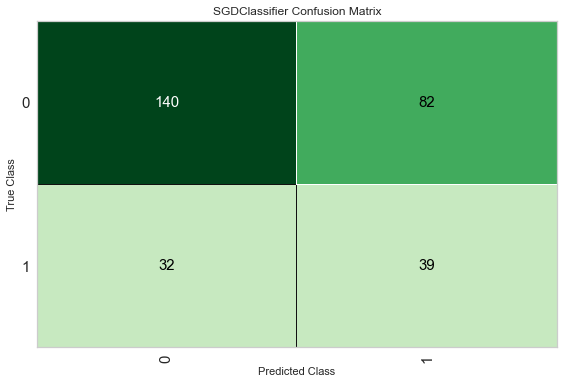

In [45]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [59]:
from pycaret.classification import *
model_setup = setup(data=dataset, target='ICU_mortality', data_split_stratify = True,pca = True, pca_components =50,normalize=True)

,Description,Value
0,session_id,1421
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(976, 64)"
5,Missing Values,False
6,Numeric Features,59
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [60]:
model = create_model("svm")
tuned_rf = tune_model(model, optimize = 'Recall',n_iter = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5507,0.0000,0.5882,0.2941,0.3922,0.0948,0.1092
1,0.5797,0.0000,0.5882,0.3125,0.4082,0.1273,0.1427
2,0.5362,0.0000,0.2353,0.1739,0.2000,-0.1163,-0.1189
3,0.5882,0.0000,0.6875,0.3235,0.4400,0.1765,0.2080
4,0.6324,0.0000,0.5625,0.3333,0.4186,0.1748,0.1876
5,0.4853,0.0000,0.3750,0.1935,0.2553,-0.0799,-0.0901
6,0.3971,0.0000,0.5000,0.1951,0.2807,-0.0874,-0.1167
7,0.5882,0.0000,0.5000,0.2857,0.3636,0.0916,0.0994
8,0.6176,0.0000,0.5625,0.3214,0.4091,0.1565,0.1699
9,0.5588,0.0000,0.4118,0.2593,0.3182,0.0164,0.0174


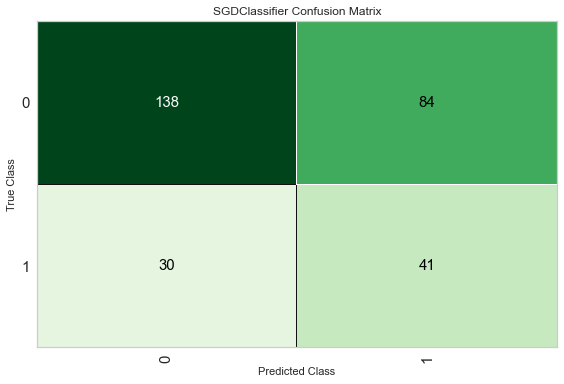

In [61]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [62]:
from pycaret.classification import *
model_setup = setup(data=dataset, target='ICU_mortality', data_split_stratify = True,pca = True, pca_components =55,normalize=True)
model = create_model("svm")
tuned_rf = tune_model(model, optimize = 'Recall',n_iter = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6377,0.0000,0.6471,0.3667,0.4681,0.2240,0.2448
1,0.5362,0.0000,0.5294,0.2727,0.3600,0.0515,0.0585
2,0.5942,0.0000,0.5882,0.3226,0.4167,0.1444,0.1597
3,0.6618,0.0000,0.6875,0.3793,0.4889,0.2664,0.2928
4,0.7353,0.0000,0.7500,0.4615,0.5714,0.3953,0.4196
5,0.5294,0.0000,0.4375,0.2333,0.3043,-0.0037,-0.0041
6,0.5882,0.0000,0.6875,0.3235,0.4400,0.1765,0.2080
7,0.7353,0.0000,0.3125,0.4167,0.3571,0.1947,0.1979
8,0.5147,0.0000,0.4375,0.2258,0.2979,-0.0181,-0.0205
9,0.7059,0.0000,0.5882,0.4348,0.5000,0.2982,0.3051


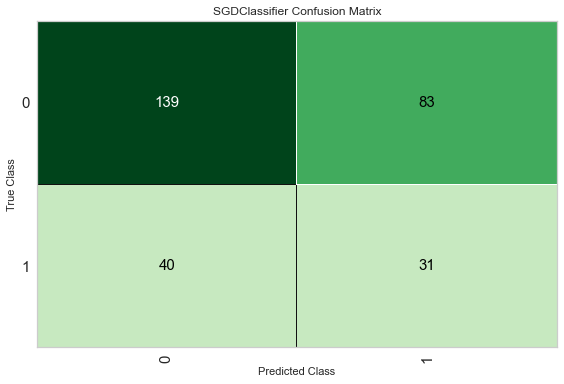

In [65]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [55]:
# feater importance

In [82]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
 
model.fit(dataset.iloc[:,1:],dataset.iloc[:,0])
 
feature_importances=pd.DataFrame({'features':dataset.iloc[:,1:].columns,'feature_importance':model.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False).head(50)


,features,feature_importance
5,age,0.043331
8,BMI,0.036468
16,pro_to_target_day3,0.035356
27,Total_EN_pro,0.034874
60,EN_pro_day3/kg,0.032501
14,pro_to_target_day1,0.032412
17,pro_to_target_day4,0.031608
13,pro_to_target_day0,0.031412
15,pro_to_target_day2,0.030430
58,EN_pro_day1/kg,0.030160


# feature_importances

In [84]:
X=dataset[feature_importances['features'].tolist()]

In [81]:
X.head()

,LOS_Group,trauma,metabolic,gastrointestinal,Sepsis,age,gender,weight,BMI,active problems,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,0,0,1,0,1,72,0,65.0,23.875115,1,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,0,0,1,0,1,58,1,101.0,32.979592,0,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,1,0,0,1,1,44,1,70.0,22.857143,3,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,0,0,1,1,0,71,0,48.0,19.227688,1,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,0,1,1,1,0,60,0,85.0,32.791945,0,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


In [88]:
X=pd.concat([dataset['ICU_mortality'],X],axis=1)

In [89]:
from pycaret.classification import *
model_setup = setup(data=X, target='ICU_mortality', data_split_stratify = True)

,Description,Value
0,session_id,5005
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(976, 64)"
5,Missing Values,False
6,Numeric Features,59
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [90]:
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7541,0.5866,0.1588,0.4533,0.2311,0.1282,0.1524,0.4620
ridge,Ridge Classifier,0.7526,0.0000,0.1162,0.3933,0.1758,0.0906,0.1137,0.0070
et,Extra Trees Classifier,0.7512,0.6409,0.1044,0.4433,0.1662,0.0807,0.1115,0.0780
nb,Naive Bayes,0.7497,0.6157,0.2018,0.4088,0.2648,0.1478,0.1584,0.0070
rf,Random Forest Classifier,0.7497,0.6030,0.0555,0.3600,0.0930,0.0338,0.0526,0.0860
lda,Linear Discriminant Analysis,0.7424,0.6178,0.1713,0.4188,0.2356,0.1160,0.1340,0.0080
qda,Quadratic Discriminant Analysis,0.7380,0.5528,0.0673,0.2800,0.1052,0.0234,0.0333,0.0110
gbc,Gradient Boosting Classifier,0.7380,0.5643,0.1162,0.3640,0.1694,0.0640,0.0798,0.1140
knn,K Neighbors Classifier,0.7321,0.5585,0.1463,0.3646,0.2056,0.0795,0.0927,0.0140
lightgbm,Light Gradient Boosting Machine,0.7235,0.6005,0.1474,0.3293,0.2012,0.0652,0.0727,0.0400


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5005, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [91]:
model = create_model("svm")
tuned_rf = tune_model(model, optimize = 'Recall',n_iter = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6812,0.0000,0.0588,0.1429,0.0833,-0.0705,-0.0807
1,0.7536,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7536,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8235,0.0000,0.4375,0.7000,0.5385,0.4365,0.4549
4,0.3235,0.0000,0.9375,0.2500,0.3947,0.0369,0.0949
5,0.7206,0.0000,0.3750,0.4000,0.3871,0.2064,0.2066
6,0.7500,0.0000,0.1250,0.4000,0.1905,0.0883,0.1094
7,0.3382,0.0000,0.8750,0.2456,0.3836,0.0255,0.0554
8,0.8235,0.0000,0.5000,0.6667,0.5714,0.4632,0.4708
9,0.4118,0.0000,0.8824,0.2830,0.4286,0.0805,0.1433


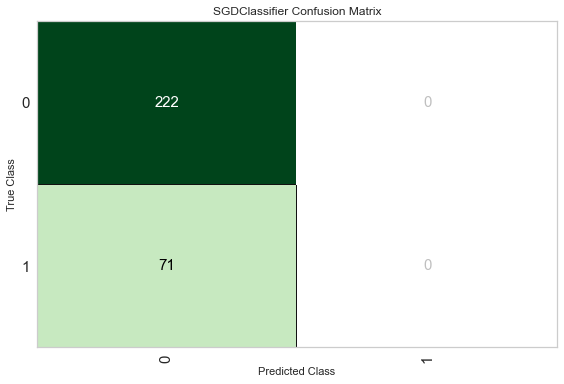

In [92]:
plot_model(tuned_rf, plot = 'confusion_matrix')

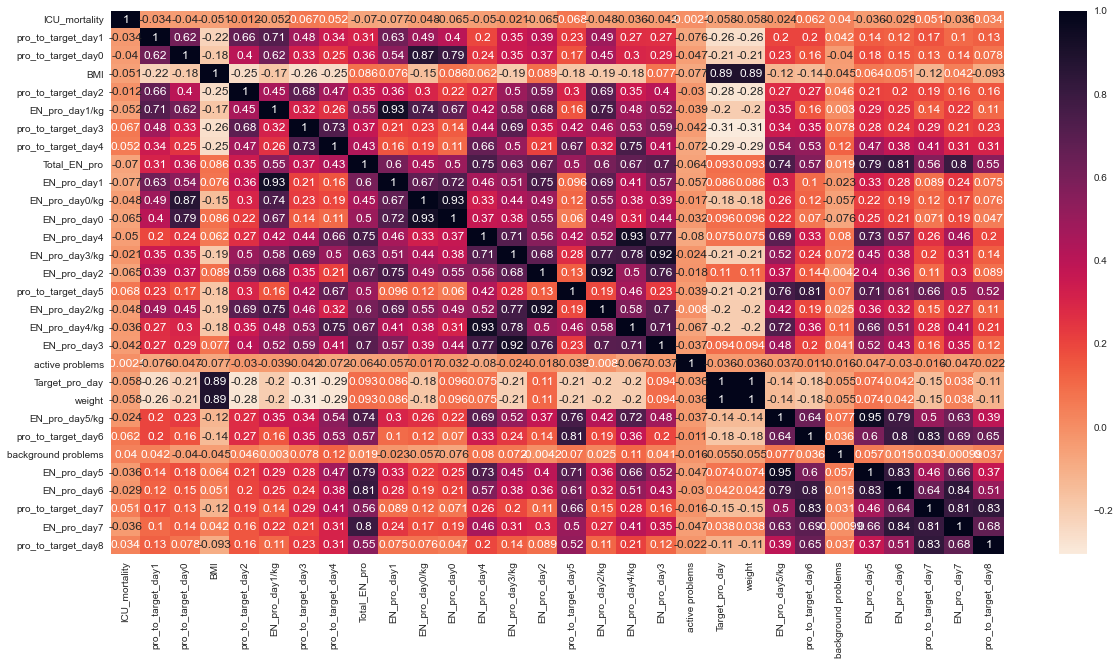

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(), annot=True, cmap='rocket_r')

plt.show()

In [113]:
dataset.head()

,LOS_Group,trauma,metabolic,gastrointestinal,Sepsis,age,gender,weight,BMI,active problems,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,0,0,1,0,1,72,0,65.0,23.875115,1,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,0,0,1,0,1,58,1,101.0,32.979592,0,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,1,0,0,1,1,44,1,70.0,22.857143,3,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,0,0,1,1,0,71,0,48.0,19.227688,1,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,0,1,1,1,0,60,0,85.0,32.791945,0,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


In [141]:
pcadata=dataset.drop('ICU_mortality',axis='columns')

In [129]:
pcadata.head()

,LOS_Group,trauma,metabolic,gastrointestinal,Sepsis,age,gender,weight,BMI,active problems,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,0,0,1,0,1,72,0,65.0,23.875115,1,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,0,0,1,0,1,58,1,101.0,32.979592,0,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,1,0,0,1,1,44,1,70.0,22.857143,3,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,0,0,1,1,0,71,0,48.0,19.227688,1,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,0,1,1,1,0,60,0,85.0,32.791945,0,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


In [147]:

from sklearn.model_selection import train_test_split
#this function randomly split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(dataset.iloc[:,1:], dataset['ICU_mortality'] ,test_size=.2)
#test_size=.3 means that our test set will be 30% of the train set.
x_train.head()

,LOS_Group,trauma,metabolic,gastrointestinal,Sepsis,age,gender,weight,BMI,active problems,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
746,0,0,0,0,0,66,0,60.0,22.038567,1,...,0.0,0.0,0.0,0.0,0.936467,1.056000,1.056000,1.056000,0.991467,1.056000
506,2,0,1,1,1,63,1,90.0,31.141869,1,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,1,1,1,0,60,0,85.0,32.791945,0,...,0.0,0.0,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529
619,0,0,1,0,1,79,1,105.0,36.332180,1,...,0.0,0.0,0.0,0.0,0.479810,0.603429,0.603429,0.603429,0.603429,0.603429
354,0,1,0,0,0,55,1,90.0,31.141869,3,...,0.0,0.0,0.0,0.0,0.312726,0.089630,0.355911,0.586015,0.189363,0.000000


In [148]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(x_train)


PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [149]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [154]:
y=clf.predict(x_test)
clf.score(x_test, y_test)
from sklearn.metrics import recall_score
recall_score(y_test, y, average='macro')

0.517454954954955

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train,y_train)
print(grid.best_estimator_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................


In [13]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# NN

from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=recall_m)
#model.fit(X.iloc[:,1:], X.ICU_mortality, epochs=150, batch_size=10)
model.fit(X.iloc[:,1:], X.ICU_mortality, epochs=80, batch_size=10)





_, recall = model.evaluate(X.iloc[:,1:], X.ICU_mortality)
print('recall: %.2f' % (recall*100))

# explore by LOS_Group

In [19]:
LOS_8=dataset[dataset['LOS_Group']=='LOS_8-13']

In [20]:
from pycaret.classification import *
model_setup = setup(data=LOS_8, target='ICU_mortality', data_split_stratify = True)

,Description,Value
0,session_id,888
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(511, 64)"
5,Missing Values,False
6,Numeric Features,53
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
#for more info: https://pycaret.org/tune-model/
model = create_model("dt")
tuned_rf = tune_model(model, optimize = 'Recall',n_iter = 30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7222,0.6914,0.6667,0.4615,0.5455,0.3548,0.3673
1,0.6667,0.6379,0.4444,0.3636,0.4000,0.1724,0.1741
2,0.6111,0.3519,0.0000,0.0000,0.0000,-0.2174,-0.2319
3,0.6667,0.5615,0.4000,0.4000,0.4000,0.1692,0.1692
4,0.7222,0.7462,0.6000,0.5000,0.5455,0.3478,0.3508
5,0.6389,0.4981,0.2000,0.2857,0.2353,0.0085,0.0087
6,0.6389,0.4981,0.1000,0.2000,0.1333,-0.0636,-0.0697
7,0.6571,0.5726,0.4444,0.3636,0.4000,0.1633,0.1650
8,0.7714,0.6432,0.4444,0.5714,0.5000,0.3548,0.3595
9,0.6286,0.5791,0.3333,0.3000,0.3158,0.0619,0.0620


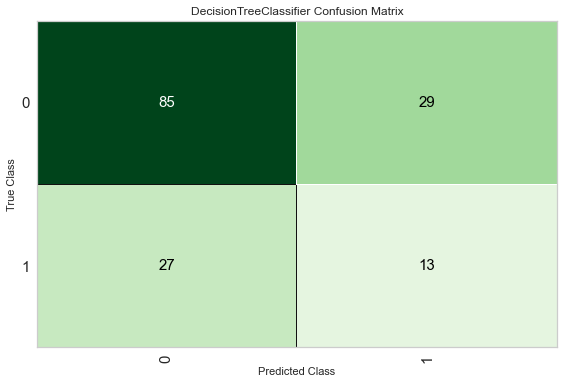

In [22]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [20]:
dataset.shape

(976, 64)

In [23]:
LOS_5=dataset[dataset['LOS_Group']=='LOS_5-7']

In [24]:
from pycaret.classification import *
model_setup = setup(data=LOS_5, target='ICU_mortality', data_split_stratify = True)
#for more info: https://pycaret.org/tune-model/
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7755,0.5594,0.0143,0.1000,0.0250,0.0037,0.0061,0.0780
et,Extra Trees Classifier,0.7692,0.5397,0.0143,0.1000,0.0250,-0.0072,-0.0084,0.0670
gbc,Gradient Boosting Classifier,0.7664,0.6301,0.1571,0.3750,0.2073,0.1126,0.1252,0.0650
lightgbm,Light Gradient Boosting Machine,0.7603,0.5902,0.1982,0.4017,0.2501,0.1397,0.1596,0.0160
ridge,Ridge Classifier,0.7601,0.0000,0.1393,0.3605,0.1771,0.0814,0.0977,0.0080
lr,Logistic Regression,0.7599,0.5683,0.1125,0.3071,0.1420,0.0569,0.0660,0.0820
ada,Ada Boost Classifier,0.7577,0.6096,0.2804,0.4600,0.3399,0.2036,0.2161,0.0360
lda,Linear Discriminant Analysis,0.7355,0.5825,0.1679,0.3426,0.2100,0.0746,0.0876,0.0080
knn,K Neighbors Classifier,0.7233,0.4953,0.0982,0.2167,0.1298,0.0010,0.0057,0.0130
dt,Decision Tree Classifier,0.6990,0.5703,0.3411,0.3193,0.3269,0.1349,0.1362,0.0080


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4466, verbose=0,
                       warm_start=False)


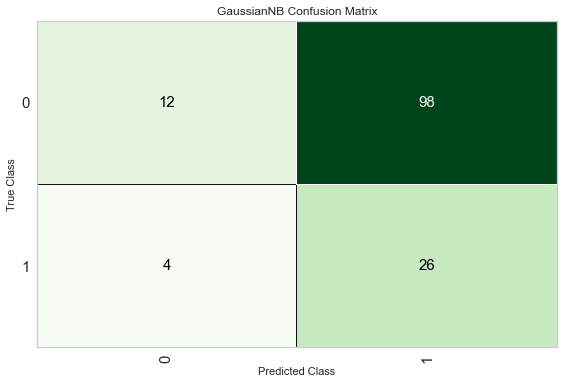

In [28]:
model = create_model("nb")
tuned_rf = tune_model(model, optimize = 'F1')
plot_model(tuned_rf, plot = 'confusion_matrix')

In [36]:
X1 = LOS_5[[ 
'ICU_mortality',
'Total_PN_pro'
,'PN_pro_day3'
,'PN_pro_day4'
,'PN_pro_day5'
,'PN_pro_day6'
,'PN_pro_day7'
,'PN_pro_day8'
,'PN_pro_day9'

 ]]
print(X1
      .shape)

(465, 9)


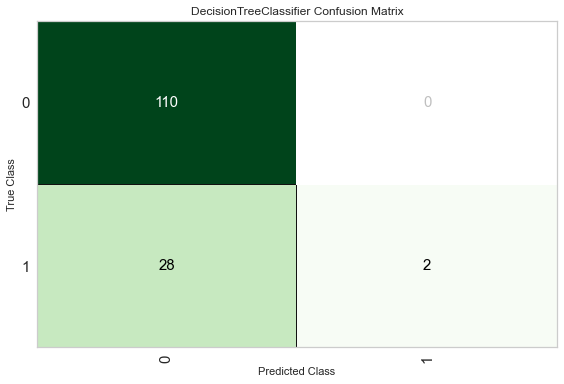

In [38]:
from pycaret.classification import *
model_setup = setup(data=X1, target='ICU_mortality', data_split_stratify = True)
#for more info: https://pycaret.org/tune-model/
model = create_model("dt")
tuned_rf = tune_model(model, optimize = 'Recall')
plot_model(tuned_rf, plot = 'confusion_matrix')

# explore by background problems

In [51]:
dataset['background problems'].value_counts()

M         404
0         225
MS        223
MTN        41
MTA        28
MSTA       17
S          13
MSTN       11
TA          4
MSTATN      3
STA         2
TAO         1
STN         1
TN          1
MO          1
MSO         1
Name: background problems, dtype: int64

In [46]:
#,'active problems'
#,'background problems'
ac1=dataset[dataset['background problems']=='M']


In [48]:
X1 = ac1[[ 
'ICU_mortality',
'Total_PN_pro'
,'PN_pro_day3'
,'PN_pro_day4'
,'PN_pro_day5'
,'PN_pro_day6'
,'PN_pro_day7'
,'PN_pro_day8'
,'PN_pro_day9'

 ]]
print(X1
      .shape)

(404, 9)


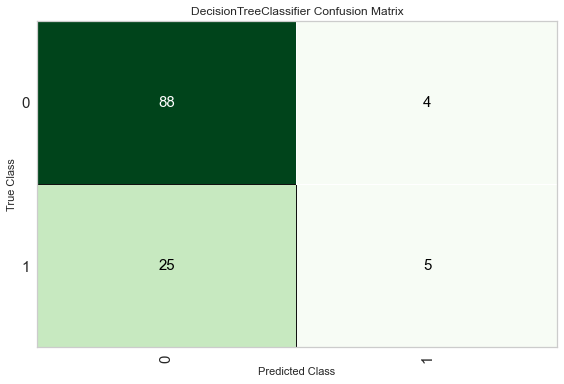

In [49]:
from pycaret.classification import *
model_setup = setup(data=X1, target='ICU_mortality', data_split_stratify = True)
#for more info: https://pycaret.org/tune-model/
model = create_model("dt")
tuned_rf = tune_model(model, optimize = 'Recall')
plot_model(tuned_rf, plot = 'confusion_matrix')

In [17]:
#,'active problems'
#,'background problems'
ac1=dataset[dataset['background problems']=='MS']
X1 = ac1[[ 
'ICU_mortality',
'Total_PN_pro'
,'PN_pro_day3'
,'PN_pro_day4'
,'PN_pro_day5'
,'PN_pro_day6'
,'PN_pro_day7'
,'PN_pro_day8'
,'PN_pro_day9'

 ]]
print(X1
      .shape)


(223, 9)


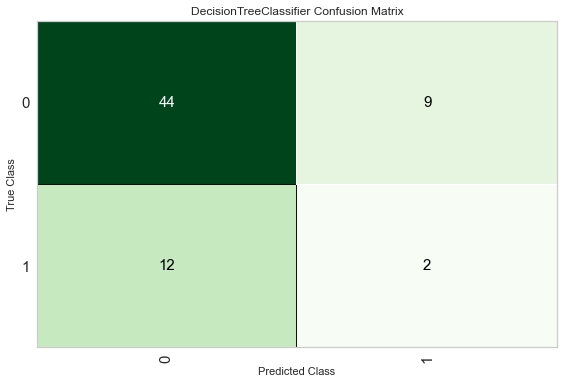

In [18]:
from pycaret.classification import *
model_setup = setup(data=ac1, target='ICU_mortality', data_split_stratify = True)
#for more info: https://pycaret.org/tune-model/
model = create_model("dt")
tuned_rf = tune_model(model, optimize = 'Recall')
plot_model(tuned_rf, plot = 'confusion_matrix')

# explore by active problems

In [54]:
dataset['active problems'].value_counts()

MS        375
M         255
MSTA      125
MTA        66
MTN        61
MSTN       32
STA        27
TA         10
S           8
MSTATN      6
MTATN       5
TN          2
MSO         2
MTAO        1
MSTAO       1
Name: active problems, dtype: int64

In [11]:
#,'active problems'
#,'background problems'
ac1=dataset[dataset['background problems']=='M']
X1 = ac1[[ 
'ICU_mortality',
'Total_PN_pro'
,'PN_pro_day3'
,'PN_pro_day4'
,'PN_pro_day5'
,'PN_pro_day6'
,'PN_pro_day7'
,'PN_pro_day8'
,'PN_pro_day9'

 ]]
print(X1
      .shape)


(223, 9)


In [12]:
from pycaret.classification import *
model_setup = setup(data=ac1, target='ICU_mortality', data_split_stratify = True)
#for more info: https://pycaret.org/tune-model/

,Description,Value
0,session_id,6689
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(223, 64)"
5,Missing Values,False
6,Numeric Features,54
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [13]:
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7688,0.5112,0.1083,0.2833,0.1486,0.0742,0.0951,0.0670
et,Extra Trees Classifier,0.7683,0.5198,0.1000,0.2500,0.1300,0.0639,0.0844,0.0620
lightgbm,Light Gradient Boosting Machine,0.7421,0.6101,0.2083,0.2933,0.2257,0.0935,0.1019,0.0270
ridge,Ridge Classifier,0.7300,0.0000,0.1417,0.2250,0.1586,0.0337,0.0367,0.0070
knn,K Neighbors Classifier,0.7246,0.4809,0.0000,0.0000,0.0000,-0.0938,-0.1104,0.0130
gbc,Gradient Boosting Classifier,0.7104,0.4515,0.1417,0.2750,0.1752,0.0173,0.0282,0.0350
ada,Ada Boost Classifier,0.6992,0.4405,0.1917,0.2083,0.1983,0.0224,0.0171,0.0270
lr,Logistic Regression,0.6929,0.4689,0.1750,0.2650,0.1930,0.0204,0.0269,0.3900
svm,SVM - Linear Kernel,0.6779,0.0000,0.3167,0.2739,0.2384,0.0806,0.1039,0.0090
lda,Linear Discriminant Analysis,0.6675,0.5106,0.2417,0.2017,0.2190,0.0116,0.0097,0.0170


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6689, verbose=0,
                       warm_start=False)


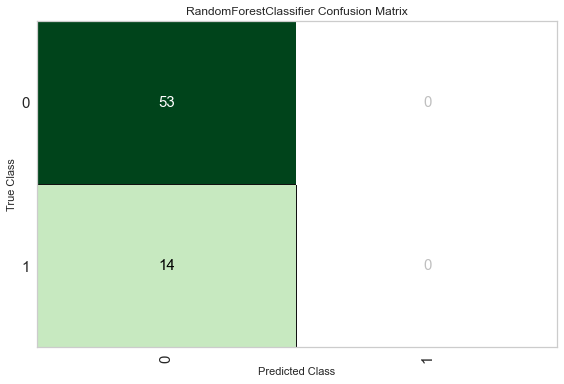

In [19]:
model = create_model("rf")
tuned_rf = tune_model(model, optimize = 'Recall',n_iter = 20)
plot_model(tuned_rf, plot = 'confusion_matrix')

In [11]:
X=dataset

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['active problems'] = le.fit_transform(X['active problems'].astype(str))
X['background problems'] = le.fit_transform(X['background problems'].astype(str))
X['gender'] = le.fit_transform(X['gender'].astype(str))
X['feeding'] = le.fit_transform(X['feeding'].astype(str))
X['LOS_Group'] = le.fit_transform(X['LOS_Group'].astype(str))

In [13]:
x = X.iloc[:,1:64]   # Second column until the last column
y = X.iloc[:,0]    # First column (Survived) is our target
from sklearn.model_selection import train_test_split
#this function randomly split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)
#test_size=.3 means that our test set will be 30% of the train set.
x_train.head()

,LOS_Group,trauma,metabolic,gastrointestinal,Sepsis,age,gender,weight,BMI,active problems,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
373,1,0,1,0,0,85,0,90.0,33.057851,1,...,53.034653,0.0,0.0,0.0,0.507630,0.643539,0.763558,0.763558,0.763558,0.902099
913,1,0,1,1,1,57,1,80.0,26.122449,1,...,0.000000,0.0,0.0,0.0,0.481333,0.074733,0.511733,0.925933,1.368000,1.368000
145,0,1,1,0,1,84,0,110.0,42.968750,3,...,0.000000,0.0,0.0,0.0,0.212800,0.310667,0.380800,0.384000,0.145600,0.000000
193,1,0,0,1,0,42,1,50.0,17.301038,0,...,0.000000,0.0,0.0,0.0,0.816640,0.654133,0.422524,0.314329,0.528000,0.844800
101,0,0,0,1,1,39,0,60.0,23.437500,10,...,0.000000,0.0,0.0,0.0,0.731133,1.047200,0.953333,0.354200,0.372533,0.461756


In [14]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
from sklearn.metrics import accuracy_score

max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,20):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters

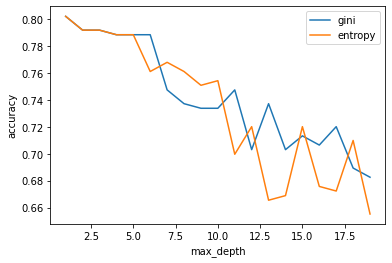

In [16]:
# visualizing changes in parameters
import matplotlib.pyplot as plt

plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

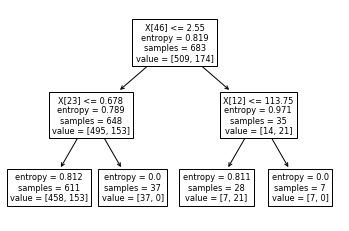

In [29]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
accuracy_score(y_test, pred)
from sklearn import tree
tree.plot_tree(dtree);

In [31]:
x_train.iloc[:,12]

373    117.0
913    104.0
145    143.0
193     65.0
101     78.0
       ...  
343     91.0
423    130.0
326    118.3
599     75.4
473    106.6
Name: Target_pro_day, Length: 683, dtype: float64

In [9]:
x2= dataset[[
    
'PN_pro_day5', 'pro_to_target_day10' ,'Target_pro_day' ,'age' ,'weight' ,'PN_pro_day8','ICU_mortality'
]]

In [10]:
x2.shape

(976, 7)

In [11]:
from pycaret.classification import *
model_setup = setup(data=x2, target='ICU_mortality', data_split_stratify = True)
#for more info: https://pycaret.org/tune-model/

,Description,Value
0,session_id,4137
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(976, 7)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7584,0.6007,0.1842,0.4622,0.2597,0.1545,0.1753,0.0060
ada,Ada Boost Classifier,0.7584,0.6093,0.1290,0.4671,0.1949,0.1119,0.1420,0.0340
lr,Logistic Regression,0.7569,0.6128,0.0298,0.3500,0.0545,0.0236,0.0543,0.0210
ridge,Ridge Classifier,0.7569,0.0000,0.0239,0.3000,0.0439,0.0179,0.0400,0.0170
qda,Quadratic Discriminant Analysis,0.7539,0.6038,0.1717,0.4678,0.2457,0.1383,0.1640,0.0170
lda,Linear Discriminant Analysis,0.7539,0.6132,0.0357,0.3667,0.0639,0.0234,0.0491,0.0080
gbc,Gradient Boosting Classifier,0.7436,0.6175,0.1037,0.3867,0.1578,0.0649,0.0860,0.0330
lightgbm,Light Gradient Boosting Machine,0.7305,0.6023,0.2011,0.3972,0.2574,0.1180,0.1303,0.0300
rf,Random Forest Classifier,0.7128,0.5999,0.2246,0.3902,0.2771,0.1123,0.1245,0.0830
et,Extra Trees Classifier,0.7128,0.5659,0.2305,0.3840,0.2816,0.1145,0.1250,0.0660


GaussianNB(priors=None, var_smoothing=1e-09)


In [37]:
model = create_model("dt")
tuned_rf = tune_model(model, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7536,0.5775,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7391,0.6295,0.1765,0.4286,0.2500,0.1241,0.1421
2,0.7536,0.5962,0.1765,0.5000,0.2609,0.1518,0.1816
3,0.7500,0.6641,0.0625,0.3333,0.1053,0.0334,0.0497
4,0.7647,0.6316,0.1250,0.5000,0.2000,0.1169,0.1560
5,0.7794,0.4718,0.0625,1.0000,0.1176,0.0925,0.2202
6,0.8529,0.6953,0.4375,0.8750,0.5833,0.5058,0.5507
7,0.7353,0.5349,0.0000,0.0000,0.0000,-0.0552,-0.0966
8,0.7647,0.5901,0.0625,0.5000,0.1111,0.0621,0.1086
9,0.7059,0.5254,0.1176,0.2857,0.1667,0.0244,0.0279


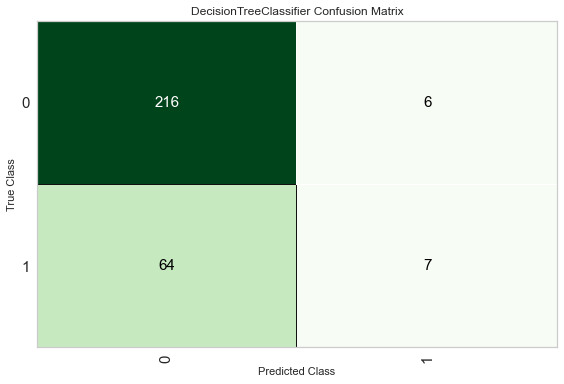

In [34]:
plot_model(tuned_rf, plot = 'confusion_matrix')

,PN_pro_day5,pro_to_target_day10,Target_pro_day,age,weight,PN_pro_day8,ICU_mortality
